---

### Crime in SA

This is a Jupyter notebook written in Python that uses the "Family & Domestic Abuse related-offences 2019-20(CSV)" dataset located at [Crime statistics (data.gov.au)](https://data.gov.au/dataset/ds-sa-860126f7-eeb5-4fbc-be44-069aa0467d11/details). 

**Notebook Goal**: Identify, categorize, and visualize **ALL** offences committed within the 2019-20 financial year.

**Interview Task Goal**: This notebook intends to emulate the the attempt of a junior developer to complete the stated goal, and the purpose of the task is to review this attempt and identify areas of improvement, such as:

- familiarity with basic programming concepts
- data comprehension
- formatting/consistency/adhereance (or lack thereof) to a style guide
- error checking/validation
- reading comprehension/attention to detail
- efficiency of investigative processes

**Note**: This is a thought exercise intended to assess familiarity with the aforementioned concepts. There is no expectation that all areas of improvement will be identified nor any expectation of specific Python experience (although it may be of benefit).

---

processing and connecting

In [1]:
from requests import *
import pandas as p
def getjson(url):
    try:
        r = get(url)
        return r
    except Exception:
        print("Exception encountered")
        r = None
    else:
        print("URL is valid")

    if type(r) == 'requests.models.Response':
      if r is not None:
        return r

r = getjson('https://data.sa.gov.au/data/api/3/action/datastore_search?resource_id=a0fe58aa-b13a-459d-9c6e-c3307a26b76f&limit=1000')

# print(r.json())

df = p.DataFrame(r.json())

df

,help,success,result
_links,https://data.sa.gov.au/data/api/3/action/help_...,True,{'start': '/api/3/action/datastore_search?reso...
fields,https://data.sa.gov.au/data/api/3/action/help_...,True,"[{'id': '_id', 'type': 'int'}, {'id': 'Financi..."
include_total,https://data.sa.gov.au/data/api/3/action/help_...,True,True
limit,https://data.sa.gov.au/data/api/3/action/help_...,True,1000
records,https://data.sa.gov.au/data/api/3/action/help_...,True,"[{'_id': 1, 'Financial Quarter And Year Name -..."
records_format,https://data.sa.gov.au/data/api/3/action/help_...,True,objects
resource_id,https://data.sa.gov.au/data/api/3/action/help_...,True,a0fe58aa-b13a-459d-9c6e-c3307a26b76f
total,https://data.sa.gov.au/data/api/3/action/help_...,True,3188
total_estimation_threshold,https://data.sa.gov.au/data/api/3/action/help_...,True,None
total_was_estimated,https://data.sa.gov.au/data/api/3/action/help_...,True,False


In [16]:
print(r.json().keys())
import json

json_object = json.loads(r.text)

print(json.dumps(json_object, indent = 2)[:715])

dict_keys(['help', 'success', 'result'])
{
  "help": "https://data.sa.gov.au/data/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "include_total": true,
    "limit": 1000,
    "records_format": "objects",
    "resource_id": "a0fe58aa-b13a-459d-9c6e-c3307a26b76f",
    "total_estimation_threshold": null,
    "records": [
      {
        "_id": 1,
        "Financial Quarter And Year Name - Reported": "Q1-2019/2020",
        "Postcode - Incident": "872",
        "Offence Level 1 Description": "OFFENCES AGAINST THE PERSON",
        "Offence Level 2 Description": "ACTS INTENDED TO CAUSE INJURY",
        "Offence Level 3 Description": "Serious Assault not resulting in injury",
        "Offence Count": 4
      },
     


In [3]:
print(json.dumps(json_object["result"]["records"][0], indent = 2))
j = json.dumps(json_object["result"]["records"], indent = 2)
df = p.DataFrame.from_dict(json_object["result"]["records"])
df

{
  "_id": 1,
  "Financial Quarter And Year Name - Reported": "Q1-2019/2020",
  "Postcode - Incident": "872",
  "Offence Level 1 Description": "OFFENCES AGAINST THE PERSON",
  "Offence Level 2 Description": "ACTS INTENDED TO CAUSE INJURY",
  "Offence Level 3 Description": "Serious Assault not resulting in injury",
  "Offence Count": 4
}


,_id,Financial Quarter And Year Name - Reported,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,1,Q1-2019/2020,872,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4
1,2,Q1-2019/2020,872,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,6
2,3,Q1-2019/2020,872,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Dangerous or negligent acts,1
3,4,Q1-2019/2020,872,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1
4,5,Q1-2019/2020,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,3
...,...,...,...,...,...,...,...
995,996,Q2-2019/2020,5049,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1
996,997,Q2-2019/2020,5049,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Other acts intended to cause injury,3
997,998,Q2-2019/2020,5049,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,3
998,999,Q2-2019/2020,5050,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1


convert financial year column

In [4]:
df["Financial Quarter And Year Name - Reported"] = \
  df["Financial Quarter And Year Name - Reported"].str[3:].replace("/20", "-", regex=True)

df

,_id,Financial Quarter And Year Name - Reported,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,1,2019-20,872,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4
1,2,2019-20,872,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,6
2,3,2019-20,872,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Dangerous or negligent acts,1
3,4,2019-20,872,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1
4,5,2019-20,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,3
...,...,...,...,...,...,...,...
995,996,2019-20,5049,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1
996,997,2019-20,5049,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Other acts intended to cause injury,3
997,998,2019-20,5049,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,3
998,999,2019-20,5050,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1


counts of offence type

In [5]:
offences = df.groupby(["Financial Quarter And Year Name - Reported", "Offence Level 2 Description"]).sum()

offences

/tmp/ipykernel_2358/3433422071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  offences = df.groupby(["Financial Quarter And Year Name - Reported", "Offence Level 2 Description"]).sum()


_id  \
Financial Quarter And Year Name - Reported Offence Level 2 Description                    
2019-20                                    ACTS INTENDED TO CAUSE INJURY         274490   
                                           FRAUD DECEPTION AND RELATED OFFENCES    3428   
                                           HOMICIDE AND RELATED OFFENCES           1843   
                                           OTHER OFFENCES AGAINST THE PERSON      51797   
                                           PROPERTY DAMAGE AND ENVIRONMENTAL      86184   
                                           ROBBERY AND RELATED OFFENCES            1512   
                                           SERIOUS CRIMINAL TRESPASS              40161   
                                           SEXUAL ASSAULT AND RELATED OFFENCES     2337   
                                           THEFT AND RELATED OFFENCES             38748   

                                                                                 Offence Count  
Financial Quarter And Year Name - Reported Offence Level 2 Description                          
2019-20                                    ACTS INTENDED TO CAUSE INJURY                  2260  
                                           FRAUD DECEPTION AND RELATED OFFENCES              8  
                                           HOMICIDE AND RELATED OFFENCES                     4  
                                           OTHER OFFENCES AGAINST THE PERSON               166  
                                           PROPERTY DAMAGE AND ENVIRONMENTAL               706  
                                           ROBBERY AND RELATED OFFENCES                      3  
                                           SERIOUS CRIMINAL TRESPASS                       111  
                                           SEXUAL ASSAULT AND RELATED OFFENCES             112  
                                           THEFT AND RELATED OFFENCES                      109

<AxesSubplot: ylabel='Offence Count'>

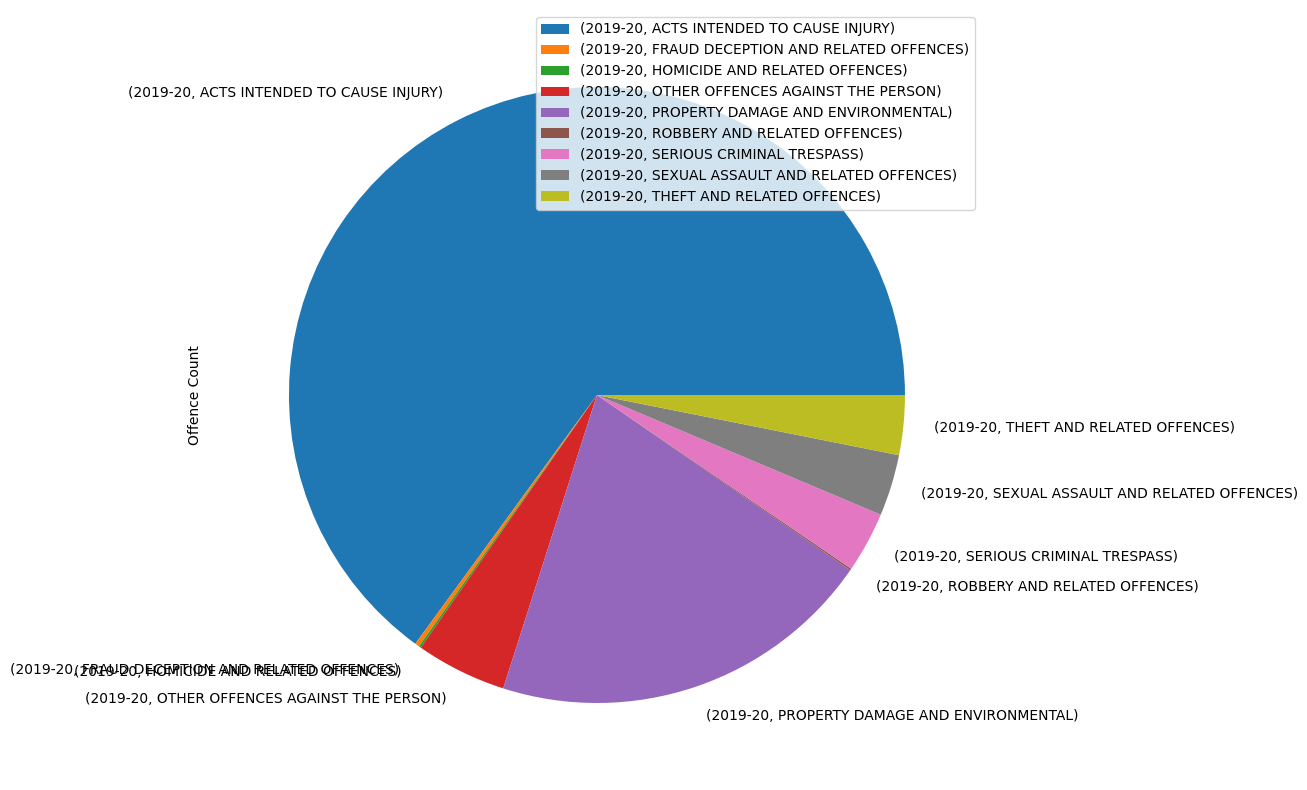

In [6]:
offences[["Offence Count"]].plot.pie(y="Offence Count", figsize=(10,10))